<a href="https://colab.research.google.com/github/Marcin19721205/WSBNeuronowe/blob/main/CW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wprowadzenie

Ten notebook ma za zadanie zapoznać nas z najważniejszymi rodzajami funkcji aktywacyjnych w sieciach neuronowych. Każdą z tych funkcji zaimplementujemy na dwa sposoby:

„Ręcznie” – tylko z wykorzystaniem numpy i podstawowych funkcji matematycznych
Z wykorzystaniem biblioteki Tensorflow/Keras Przyjrzymy się też wykresom i charakterystyce każdej z tych funkcji.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

#Ćwiczenie 1a - sigmoid - implementacja ze wzoru

Sigmoid jest jedną z najczęściej wykorzystywanych funkcji aktywacji, dla problemów klasyfikacji binarnej. Niestety jest podatny na problem „nasycenia” – gdy wartości wejściowe są duże, funkcja szybko się „wypłaszcza” co spowalnia proces uczenia się.

Równanie funkcji wygląda następująco:

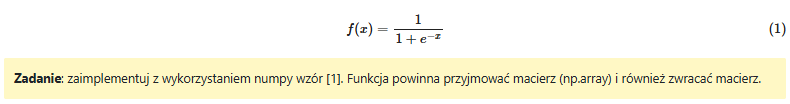

In [5]:
#definicja sigmoidu
def sigmoid_manual(x: np.array) -> np.array:
    return 1 / (1 + np.exp(-x))


In [6]:
#sprawdzenie wyników
x_and_expected = [(0.1, 0.525), (0.2, 0.55), (0.5, 0.622), (0.8, 0.69)]  # para: wejście i oczekiwany wynik

for x, y in x_and_expected:  # iterujemy po parach
    assert np.round(sigmoid_manual(x), 3) == y  # zaokrąglamy wynik i porównujemy z oczekiwanym


#Ćwiczenie 1b - sigmoid - wykres

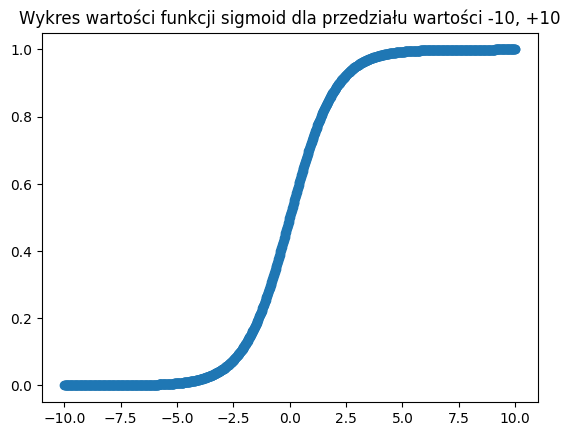

In [11]:
# --- Narysuj wykres ---
x = np.linspace(-10, 10, num=1000)      # generujemy 100 punktów od -10 do 10
ys = sigmoid_manual(x)                 # obliczamy wartości sigmoid wektorowo dla całego x
plt.scatter(x, ys)                     # rysujemy punkty na wykresie
plt.title("Wykres wartości funkcji sigmoid dla przedziału wartości -10, +10")  # tytuł wykresu
plt.show()                             # wyświetlamy wykres


#Ćwiczenie 1c - sigmoid pochodna

In [8]:
def delta_sigmoid(x: np.array) -> np.array:            # definiujemy funkcję pochodnej sigmoida
    s = sigmoid_manual(x)                              # obliczamy sigmoid(x) raz, żeby nie liczyć dwukrotnie
    return s * (1 - s)                                 # wzór: sigmoid(x) * (1 - sigmoid(x))


In [9]:
xs = np.array([0.2, 0.5, 0.8])                         # wartości wejściowe
y_expected = np.array([0.248, 0.235, 0.214])           # oczekiwane wyniki po zaokrągleniu
y_actual = np.round(delta_sigmoid(xs), 3)              # liczymy pochodną i zaokrąglamy do 3 miejsc
assert np.all(y_expected == y_actual)                  # sprawdzamy poprawność dla całej tablicy


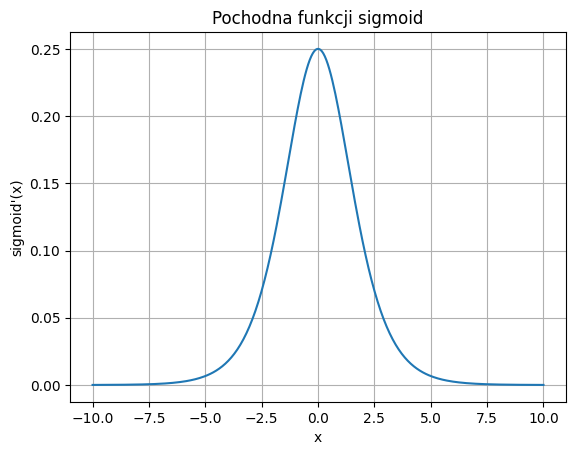

In [10]:
# --- przygotowanie danych ---
x = np.linspace(-10, 10, 300)           # 300 punktów równomiernie z zakresu [-10, 10]
y = delta_sigmoid(x)                    # obliczamy pochodną sigmoida wektorowo

# --- rysowanie wykresu ---
plt.plot(x, y)                          # rysujemy linię pochodnej
plt.title("Pochodna funkcji sigmoid")   # tytuł wykresu
plt.xlabel("x")                         # podpis osi X
plt.ylabel("sigmoid'(x)")               # podpis osi Y
plt.grid(True)                          # siatka dla czytelności
plt.show()                              # wyświetlamy wykres


#Ćwiczenie 2a - tangens hiperboliczny - implementacja ze wzoru

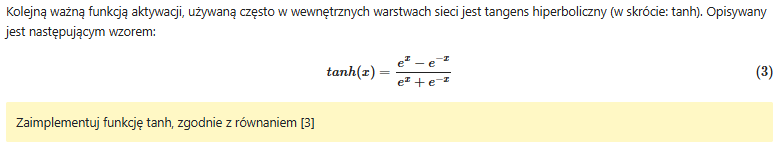

In [12]:
def tanh_manual(x: np.array) -> np.array:            # definiujemy funkcję zwracającą tanh
    e_pos = np.exp(x)                                # obliczamy e^x
    e_neg = np.exp(-x)                               # obliczamy e^{-x}
    return (e_pos - e_neg) / (e_pos + e_neg)         # wzór: (e^x - e^{-x}) / (e^x + e^{-x})


In [13]:
xs = np.array([-1, -0.5, 0.0, 0.5, 1.0])             # wejścia do funkcji tanh
y_expected = np.array([-0.762, -0.462, 0.0, 0.462, 0.762])  # oczekiwane wyniki po zaokrągleniu
y_actual = np.round(tanh_manual(xs), 3)              # liczymy tanh i zaokrąglamy do 3 miejsc
assert np.all(y_expected == y_actual)                # sprawdzamy zgodność


#Ćwiczenie 2b - tangens hiperboliczny wykres

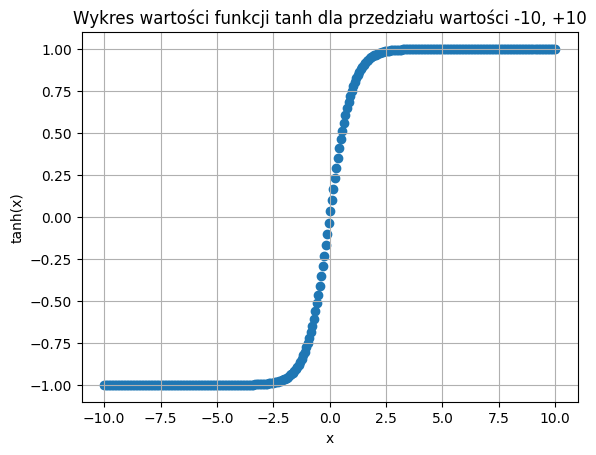

In [15]:

# --- Narysuj wykres ---
x = np.linspace(-10, 10, num=300)          # generujemy 100 punktów od -10 do 10
ys = tanh_manual(x)                        # obliczamy tanh dla całego wektora x
plt.scatter(x, ys)                         # rysujemy punkty wykresu
plt.title("Wykres wartości funkcji tanh dla przedziału wartości -10, +10")  # tytuł
plt.xlabel("x")                            # podpis osi X
plt.ylabel("tanh(x)")                      # podpis osi Y
plt.grid(True)                             # siatka dla czytelności
plt.show()                                 # wyświetlamy wykres


#Ćwiczenie 2c - tangens hiperboliczny - pochodna

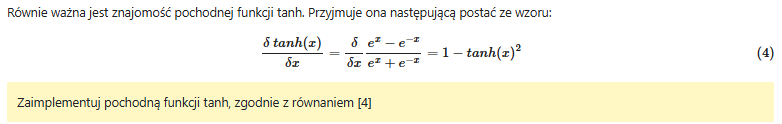

In [16]:
def delta_tanh(x: np.array) -> np.array:        # definiujemy funkcję pochodnej tanh
    t = tanh_manual(x)                          # liczymy tanh(x) raz, żeby nie powtarzać obliczeń
    return 1 - t**2                              # wzór: 1 - tanh(x)^2


In [17]:
xs = np.array([0.2, 0.5, 0.8])                   # wejścia
y_expected = np.array([0.961, 0.786, 0.559])     # oczekiwane wartości po zaokrągleniu
y_actual = np.round(delta_tanh(xs), 3)           # liczymy i zaokrąglamy do 3 miejsc

assert np.all(y_actual == y_expected)            # sprawdzamy poprawność


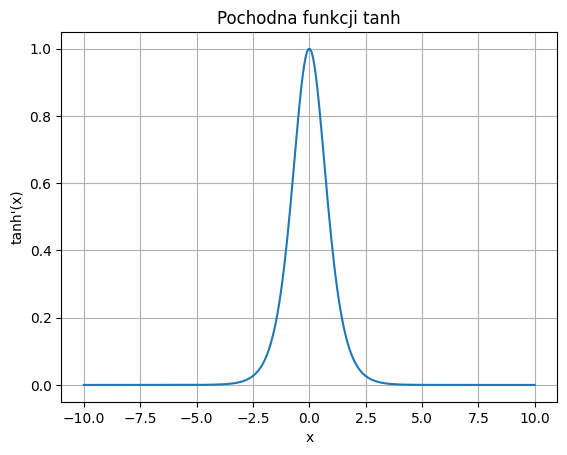

In [18]:
# --- przygotowanie danych ---
x = np.linspace(-10, 10, 300)           # generujemy 300 punktów od -10 do 10
y = delta_tanh(x)                       # obliczamy pochodną tanh wektorowo

# --- rysowanie wykresu ---
plt.plot(x, y)                          # rysujemy linię wykresu
plt.title("Pochodna funkcji tanh")      # tytuł wykresu
plt.xlabel("x")                         # podpis osi X
plt.ylabel("tanh'(x)")                  # podpis osi Y
plt.grid(True)                          # włączamy siatkę
plt.show()                              # wyświetlamy wykres


#Porównanie sigmoid i tanh oraz pochodnych

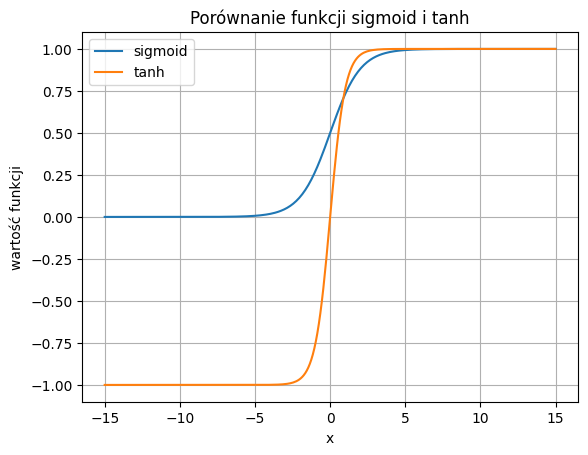

In [20]:
# --- przygotowanie danych ---
x = np.linspace(-15, 15, 300)           # 300 punktów na osi x
y_sig = sigmoid_manual(x)               # wartości funkcji sigmoid
y_tanh = tanh_manual(x)                 # wartości funkcji tanh

# --- rysowanie ---
plt.plot(x, y_sig, label="sigmoid")     # rysujemy sigmoid
plt.plot(x, y_tanh, label="tanh")       # rysujemy tanh
plt.title("Porównanie funkcji sigmoid i tanh")  # tytuł
plt.xlabel("x")                         # podpis osi x
plt.ylabel("wartość funkcji")           # podpis osi y
plt.grid(True)                          # siatka
plt.legend()                            # legenda
plt.show()                              # wyświetlenie wykresu


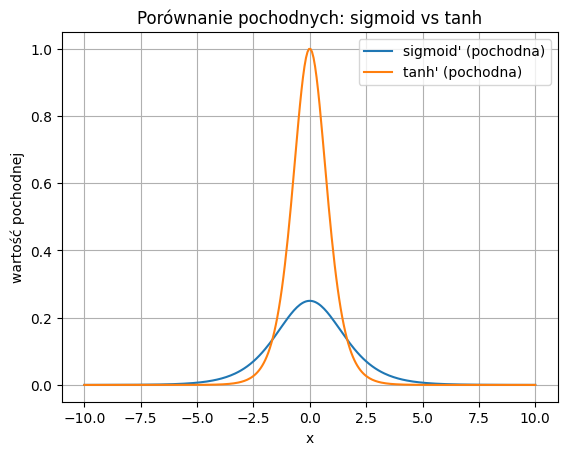

In [21]:

# --- przygotowanie danych ---
x = np.linspace(-10, 10, 300)           # generujemy 300 punktów od -10 do 10
y_sig_d = delta_sigmoid(x)              # pochodna sigmoid
y_tanh_d = delta_tanh(x)                # pochodna tanh

# --- rysowanie ---
plt.plot(x, y_sig_d, label="sigmoid' (pochodna)")   # wykres pochodnej sigmoida
plt.plot(x, y_tanh_d, label="tanh' (pochodna)")     # wykres pochodnej tanh
plt.title("Porównanie pochodnych: sigmoid vs tanh")  # tytuł wykresu
plt.xlabel("x")                                      # podpis osi X
plt.ylabel("wartość pochodnej")                      # podpis osi Y
plt.grid(True)                                       # siatka
plt.legend()                                         # legenda
plt.show()                                           # pokazanie wykresu
